In [2]:
#required packages with versions
"""
!pip install numpy==1.21.2
!pip install seaborn==0.11.1
!pip install matplotlib==3.4.3
!pip install statsmodels==0.12.2
!pip install pandas==1.2.4
!pip install scipy==1.6.3
!pip install scikit_learn==0.24.2
"""

'\n!pip install numpy==1.21.2\n!pip install seaborn==0.11.1\n!pip install matplotlib==3.4.3\n!pip install statsmodels==0.12.2\n!pip install pandas==1.2.4\n!pip install scipy==1.6.3\n!pip install scikit_learn==0.24.2\n'

In [3]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


#Load the data as a data frame
df=pd.read_csv('EPL_Soccer_MLR_LR.csv')

# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
df.describe()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [4]:
#Get info, look for missing values, get a sense of what format each variable is in


df.info()
#We are attempting to predict score
#Look at correlations between variables to identify best predictor for response (score)
df.corr()

#Can see the strongest predictor of score is cost, with a 96% correlation
# BMI body mass index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


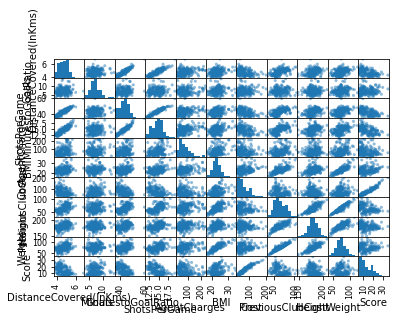

In [5]:
# Plot Matrix to identify if there is any linear relationship between variables
pd.plotting.scatter_matrix(df)
plt.show()

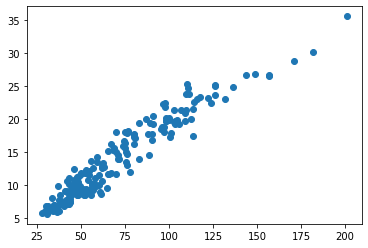

In [4]:
#Let's plot cost vs. score
plt.scatter(df['Cost'], df['Score']);

#Strong linear association between cost and score, maybe some concern with model
# after a cost of 125 or so!


In [6]:
#Assign x, y then do training testing split
x=df['Cost']
y=df['Score']

#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

# Ordinay Least Squares:
Calculate B0 and B1; Check the notes of the class it has the respective equations.

In [7]:
#statsmodel approach to regression 
# Ordinary Least Squares regression (OLS)
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                   3.84e-144
Time:                        23:19:13   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           6.91e-88
Time:                        23:19:47   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = B0 + B1*X + Epsilon 
Epsion : is the error related to the linear regression with mean (0) and variace (sigma^2)

const    0.947185
Cost     0.182083
dtype: float64


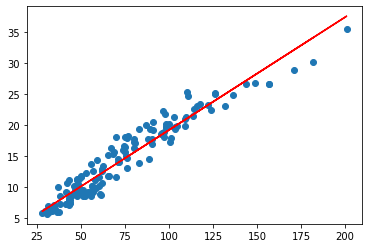

In [9]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

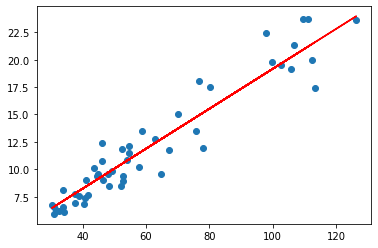

In [276]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

# Correlation vs. Causation
### Correlation:
Describes an association between variables: when one variable changes, so does the other. A correlation is a statistical indicator of the relationship between variables. These variables change together: they covary. But this covariation isn’t necessarily due to a direct or indirect causal link.

### Causation:
Means that changes in one variable brings about changes in the other; there is a cause-and-effect relationship between variables. The two variables are correlated with each other and there is also a causal link between them.

A correlation doesn’t imply causation, but causation always implies correlation.

### Link with further explanation:
https://www.scribbr.com/methodology/correlation-vs-causation/#:~:text=does%20the%20other.-,A%20correlation%20is%20a%20statistical%20indicator%20of%20the%20relationship%20between,and%2Deffect%20relationship%20between%20variables.

# Confounding: 
Cause surprise or confusion in (someone), especially by not according with their expectations. 
# Lurking variables: 
A lurking variable is a variable that is unknown and not controlled for; It has an important, significant effect on the variables of interest. They are extraneous variables, but may make the relationship between dependent variables and independent variables seem other than it actually is.
### Lurking variables will cause your results to be biased.
### How to identify lurking variables:
For research results to be valid lurking variables must be identified and then either eliminated, held constant, or included in the study. They can be identified with regression analysis: plot the residuals, and if you see a trend (either linear or non-linear), this is evidence that particular variable is affecting the response variable (Fligner et. al).


# Residuals:
 r_i = [y_i_actual - y_i_predicted]; r_i sometimes >0 sometimes <0
 r_i = y_i_actual - [B0 + B1*x_i_actual]
 ### Q = Q criterion 
 It is the summatory of the square values of the residuals; when the residuals are elevated to the square it avoids the direct cancelation between negative and positive residual values. That is why abs(r_i) is not a good indicator of the regression model. 
 Q criterion is a good indicator of how good the regression model is. Q is what we are trying to minimize;
 Q = sum[(r_i)^2]
 
 ### By partially derivating Q based on B0 and B1 we obtain the equations proposed by OLS for B0 and B1. 


# Gauss-Markov Theorem
Properties:
(i) it is unbaised. 
(ii) Minimum variance amongst unbiased linear estimators.

Assumptions:
E[epsilon_i] = 0
Var(epsilon_i) = sigma^2 < infinit for all i
Cov(epsilon_i,epsilon_j) = 0, for all i <> j (<> different)


# Bayesian paradigm
The Bayesian paradigm dictates that inference about the true should be based on given by.
La probabilidad bayesiana es una de las diferentes interpretaciones del concepto de probabilidad. La interpretación bayesiana de la probabilidad puede ser vista como una extensión de la lógica proposicional que permite razonar con hipótesis, es decir, las proposiciones cuya veracidad o falsedad son inciertas.
El término "bayesiano" se refiere al matemático del siglo XVIII y teólogo Thomas Bayes, que proporcionó el primer tratamiento matemático de un problema no trivial de la inferencia bayesiana.4​ El matemático Pierre-Simon Laplace fue pionero y popularizó lo que ahora se llama probabilidad bayesiana.5​
La inferencia bayesiana es un tipo de inferencia estadística en la que las evidencias u observaciones se emplean para actualizar o inferir la probabilidad de que una hipótesis pueda ser cierta.
Link: stsci.edu/stsci/meetings/irw/proceedings/molinar.dir/section3_2.html#:~:text=The%20Bayesian%20paradigm%20dictates%20that,posteriori%20(MAP)%20estimate%20of%20.

# Frequentist paradigm
Frequentist statistics is so called because it's approach to probability considers the frequency of occurrence of the outcome of a random event repeated many times.

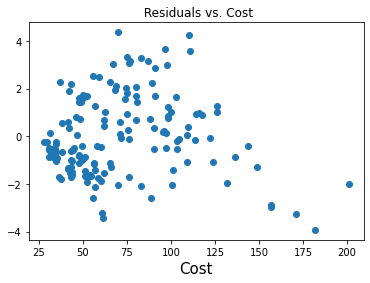

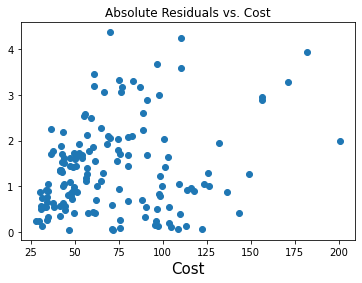

/Users/theodoreandersson/Documents/GitHub/turo/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


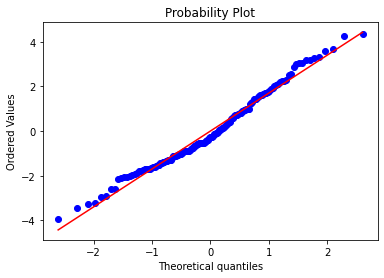

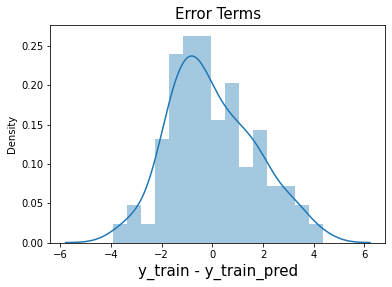

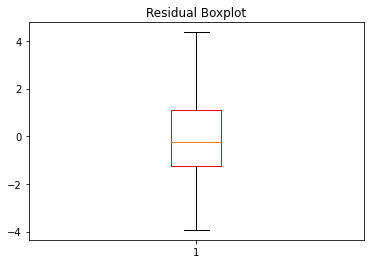

In [277]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

#Normality plot
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

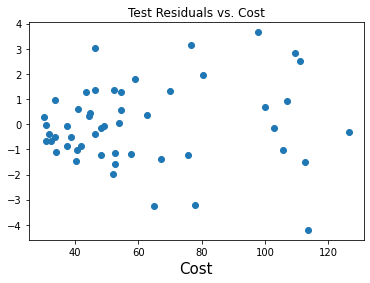

In [278]:
#Demo of how to deal with non-constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Some evidence of non-constant variance




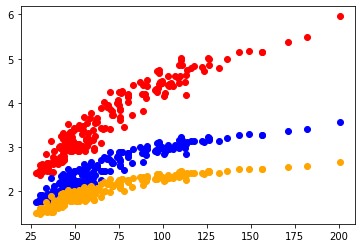

In [279]:
#

#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(x, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

In [280]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           9.72e-75
Time:                        20:36:46   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.967367
Cost     0.023433
dtype: float64


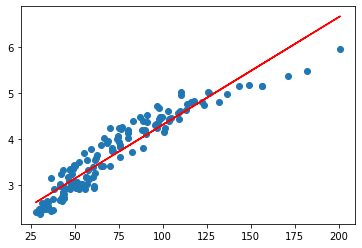

In [281]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

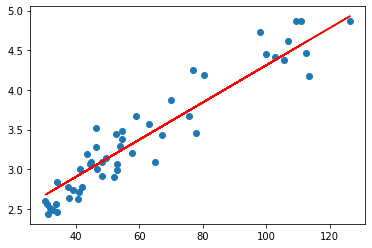

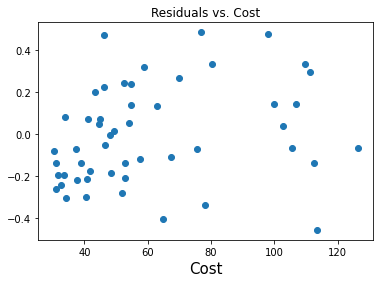

In [282]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination